In [10]:
#constructing dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification,DistilBertConfig
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import numpy as np
import jsonlines as js
from torch import optim as opt
import torch.nn as nn
import torch.nn.functional as F
from datasets import load_dataset
len_train=4000
len_valid=400
len_test=400
class text_data(Dataset):
    def __init__(self,path):
        self.file_path = path
        f=open(path,"r")
        self.json=[x for x in js.Reader(f)]
        f.close()
    def __getitem__(self,index):
        line=self.json[index]
        text=line['text']
        text=tokenizer(text, max_length = 4096, truncation=True,return_tensors="pt")["input_ids"]
        label=[0,0]
        label[line['label']]=1
        return text,torch.FloatTensor(label)

    def __len__(self):
        return len(self.json)
train_set=text_data('../data/train.jsonl')
part_train_set=random_split(train_set,[len_train,len(train_set)-len_train])[0]
train_loader=DataLoader(part_train_set, batch_size=1,shuffle=True)
valid_set=text_data('../data/fake_news_validation.jsonl')
part_valid_set=random_split(valid_set,[len_valid,len(valid_set)-len_valid])[0]
valid_loader=DataLoader(part_valid_set, batch_size=1,shuffle=True)
test_set=text_data('../data/fake_news_test.jsonl')
part_test_set=random_split(valid_set,[len_test,len(test_set)-len_test])[0]
test_loader=DataLoader(part_test_set, batch_size=1,shuffle=True)

In [ ]:
#Validating ability using part trainset
from torch import optim as opt
import torch.nn as nn
import torch.nn.functional as F
config=DistilBertConfig.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
config.max_position_embeddings=4096
model = DistilBertForSequenceClassification(config).to(0)
optimizer=opt.Adam(model.parameters(),lr=0.00001)
Loss_f=nn.CrossEntropyLoss()
epochs=15
train_acc=[]
valid_acc=[]
part_set=random_split(part_train_set,[100,len(part_train_set)-100])[0]
part_loader=DataLoader(part_set, batch_size=1,shuffle=True)
for i in range(0,epochs):
    x=0
    correct_case=0
    model.train()
    for text,label in part_loader:
        input =text.squeeze(1).to(0)
        optimizer.zero_grad()
        pred=model(input).logits.to(0)
        label=label.to(0)
        loss=Loss_f(pred,label).to(0)
        loss.backward()
        optimizer.step()
        if (pred.argmax()==label.argmax()):
            correct_case+=1
    print ("train_acc="+str(correct_case/100))
    train_acc.append(correct_case/100)
    correct_case=0
    model.eval()
    for text,label in valid_loader:
        input =text.squeeze(1).to(0)
        try:
            pred=model(input).logits.squeeze(0).to(0)
            label=label.to(0).squeeze(0)
            if (pred.argmax()==label.argmax()):
                correct_case+=1
        except RuntimeError as e:
                print(str(e))
                continue
    valid_acc.append(correct_case/len_valid)
    print ("valid_acc="+str(correct_case/len_valid))
'''
    for text,label in train_loader:
        input = tokenizer(text, return_tensors="pt").cuda()
        pred=F.softmax(model(**input).logits).squeeze(0).cuda()
        loss=Loss_f(pred,label).cuda()
        print(loss)
        loss.backward()
        optimizer.step()
''' 
'''
with torch.no_grad():
    logits = model(**inputs).logits
predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]
'''

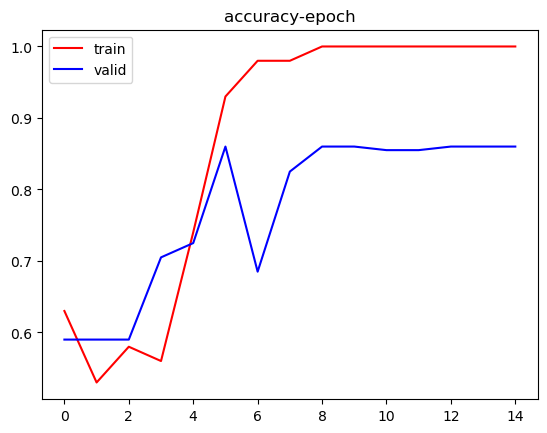

In [19]:
from matplotlib import pyplot as plt
x=np.arange(15)
plt.plot(x,train_acc,c='red',label="train")
plt.plot(x,valid_acc,c='blue',label="valid")
plt.legend()
plt.title("accuracy-epoch")
plt.show()

In [2]:
#Bert
config=DistilBertConfig.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
config.max_position_embeddings=4096
model = DistilBertForSequenceClassification(config).to(0)
optimizer=opt.Adam(model.parameters(),lr=0.00001)
Loss_f=nn.CrossEntropyLoss()

epochs=15
train_acc=[]
valid_acc=[]
max_acc=0
for i in range(0,epochs):
    x=0
    correct_case=0
    model.train()
    for text,label in train_loader:
        input =text.squeeze(1).to(0)
        optimizer.zero_grad()
        pred=model(input).logits.to(0)
        label=label.to(0)
        loss=Loss_f(pred,label).to(0)
        loss.backward()
        optimizer.step()
        if (pred.argmax()==label.argmax()):
            correct_case+=1
    print ("train_acc="+str(correct_case/len_train))
    train_acc.append(correct_case/len_train)
    correct_case=0
    model.eval()
    for text,label in valid_loader:
        input =text.squeeze(1).to(0)
        try:
            pred=model(input).logits.squeeze(0).to(0)
            label=label.to(0).squeeze(0)
            if (pred.argmax()==label.argmax()):
                correct_case+=1
        except RuntimeError as e:
                print(str(e))
                continue
    valid_acc.append(correct_case/len_valid)
    if(correct_case/len_valid>max_acc):
        max_acc=correct_case/len_valid
        torch.save(model,"best.pt")
    print ("valid_acc="+str(correct_case/len_valid))
'''
    for text,label in train_loader:
        input = tokenizer(text, return_tensors="pt").cuda()
        pred=F.softmax(model(**input).logits).squeeze(0).cuda()
        loss=Loss_f(pred,label).cuda()
        print(loss)
        loss.backward()
        optimizer.step()
'''
'''
with torch.no_grad():
    logits = model(**inputs).logits
predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]
'''

train_acc=0.81975
valid_acc=0.91
train_acc=0.93675
valid_acc=0.9325
train_acc=0.96975
valid_acc=0.925
train_acc=0.98125
valid_acc=0.9225
train_acc=0.98975
valid_acc=0.88
train_acc=0.995
valid_acc=0.945
train_acc=0.99525
valid_acc=0.9325
train_acc=0.99725
valid_acc=0.94
train_acc=0.999
valid_acc=0.94
train_acc=0.99675
valid_acc=0.9375
train_acc=0.998
valid_acc=0.935
train_acc=0.99975
valid_acc=0.8225
train_acc=0.998
valid_acc=0.93
train_acc=0.9985
valid_acc=0.9375
train_acc=1.0
valid_acc=0.9375


'\nwith torch.no_grad():\n    logits = model(**inputs).logits\npredicted_class_id = logits.argmax().item()\nmodel.config.id2label[predicted_class_id]\n'

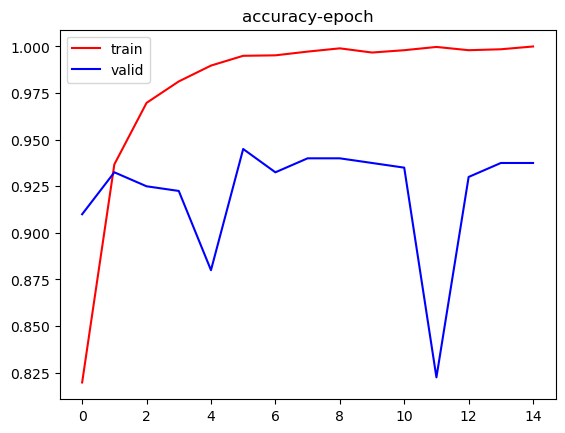

In [5]:
from matplotlib import pyplot as plt
x=np.arange(15)
plt.plot(x,train_acc,c='red',label="train")
plt.plot(x,valid_acc,c='blue',label="valid")
plt.legend()
plt.title("accuracy-epoch")
plt.show()

In [12]:
#test
model=torch.load("best.pt")
model.eval()
correct_case=0
for text,label in test_loader:
    input =text.squeeze(1).to(0)
    pred=model(input).logits.to(0)
    label=label.to(0)
    if (pred.argmax()==label.argmax()):
        correct_case+=1
print ("test_acc="+str(correct_case/len_test))
    

C:\Users\15095\AppData\Local\Temp\ipykernel_4320\3299388708.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model=torch.load("best.pt")


test_acc=0.9475
